## Import librabries:

In [91]:
# Import librabries:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Reading files:

In [92]:
data=pd.read_csv("winemag-data-130k-v2.csv")

### Data Checking and Cleaning:

In [93]:
# Call out the first 5 rows of the dataset
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [94]:
data.shape

(129971, 14)

In [95]:
# Dataset information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 14 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             129971 non-null  int64  
 1   country                129908 non-null  object 
 2   description            129971 non-null  object 
 3   designation            92506 non-null   object 
 4   points                 129971 non-null  int64  
 5   price                  120975 non-null  float64
 6   province               129908 non-null  object 
 7   region_1               108724 non-null  object 
 8   region_2               50511 non-null   object 
 9   taster_name            103727 non-null  object 
 10  taster_twitter_handle  98758 non-null   object 
 11  title                  129971 non-null  object 
 12  variety                129970 non-null  object 
 13  winery                 129971 non-null  object 
dtypes: float64(1), int64(2), object(11)


### Describe Dataset

In [96]:
data.describe()

,Unnamed: 0,points,price
count,129971.000000,129971.000000,120975.000000
mean,64985.000000,88.447138,35.363389
std,37519.540256,3.039730,41.022218
min,0.000000,80.000000,4.000000
25%,32492.500000,86.000000,17.000000
50%,64985.000000,88.000000,25.000000
75%,97477.500000,91.000000,42.000000
max,129970.000000,100.000000,3300.000000


In [97]:
# describe categorical values columns
data.describe(include = 'object').transpose()

,count,unique,top,freq
country,129908,43,US,54504
description,129971,119955,"Gravenstein apple, honeysuckle and jasmine aro...",3
designation,92506,37979,Reserve,2009
province,129908,425,California,36247
region_1,108724,1229,Napa Valley,4480
region_2,50511,17,Central Coast,11065
taster_name,103727,19,Roger Voss,25514
taster_twitter_handle,98758,15,@vossroger,25514
title,129971,118840,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...,11
variety,129970,707,Pinot Noir,13272


In [98]:
# drop a column 'Unnamed: 0'
data.drop(['Unnamed: 0','description'], axis=1,inplace=True)

In [99]:
# we want to find out if there are any null values in columns. Check using pandas’ isnull()
data.isnull().sum()

country                     63
designation              37465
points                       0
price                     8996
province                    63
region_1                 21247
region_2                 79460
taster_name              26244
taster_twitter_handle    31213
title                        0
variety                      1
winery                       0
dtype: int64

In [100]:
data.head()

,country,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [101]:
data.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'region_2', 'taster_name', 'taster_twitter_handle', 'title', 'variety',
       'winery'],
      dtype='object')

In [102]:
# filling null value by mean() and median()
data['points'].fillna(data['points'].mean(), inplace=True) # Mean
data['price'].fillna(data['price'].median(), inplace=True)  #median


### Value counts for categorical values

In [103]:
data["designation"].value_counts()

Reserve                         2009
Estate                          1322
Reserva                         1259
Riserva                          698
Estate Grown                     621
                                ... 
Graham's Block 7                   1
Horse Rescue Mirage                1
Eco Made with Organic Grapes       1
Praepositus Moscato Rosa           1
Nectar                             1
Name: designation, Length: 37979, dtype: int64

In [104]:
data["province"].value_counts()

California    36247
Washington     8639
Bordeaux       5941
Tuscany        5897
Oregon         5373
              ...  
Dolenjska         1
Messinia          1
Markopoulo        1
Lemesos           1
Alenteo           1
Name: province, Length: 425, dtype: int64

In [105]:
data["country"].value_counts()

US                        54504
France                    22093
Italy                     19540
Spain                      6645
Portugal                   5691
Chile                      4472
Argentina                  3800
Austria                    3345
Australia                  2329
Germany                    2165
New Zealand                1419
South Africa               1401
Israel                      505
Greece                      466
Canada                      257
Hungary                     146
Bulgaria                    141
Romania                     120
Uruguay                     109
Turkey                       90
Slovenia                     87
Georgia                      86
England                      74
Croatia                      73
Mexico                       70
Moldova                      59
Brazil                       52
Lebanon                      35
Morocco                      28
Peru                         16
Ukraine                      14
Serbia  

In [106]:
data["taster_name"].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

In [107]:
data["variety"].value_counts()

Pinot Noir                  13272
Chardonnay                  11753
Cabernet Sauvignon           9472
Red Blend                    8946
Bordeaux-style Red Blend     6915
                            ...  
Tinta Negra Mole                1
Doña Blanca                     1
Graševina                       1
Vidadillo                       1
Maria Gomes-Bical               1
Name: variety, Length: 707, dtype: int64

In [108]:
data["region_1"].value_counts()

Napa Valley                                          4480
Columbia Valley (WA)                                 4124
Russian River Valley                                 3091
California                                           2629
Paso Robles                                          2350
                                                     ... 
Vin de Pays de l'Atlantique                             1
McLaren Vale-Langhorne Creek                            1
Vino de la Tierra Ribera del Gállego-Cinco Villas       1
Mâcon-Pierreclos                                        1
Coteaux d'Ancenis                                       1
Name: region_1, Length: 1229, dtype: int64

### filling null categorical values

In [109]:
# filling null value by mode value
data['designation'].fillna(data['designation'].mode().values[0], inplace=True) # Mode
data['province'].fillna(data['province'].mode().values[0], inplace=True) # Mode
data['country'].fillna(data['country'].mode().values[0], inplace=True) # Mode
data['taster_name'].fillna(data['taster_name'].mode().values[0], inplace=True) # Mode
data['variety'].fillna(data['variety'].mode().values[0], inplace=True) # Mode
data['region_1'].fillna(data['region_1'].mode().values[0], inplace=True) # Mode

In [110]:
# Remove two columns name 'region_2' and 'taster_twitter_handle'
data.drop(['region_2', 'taster_twitter_handle'], axis = 1,inplace=True)

In [111]:
# we want to find out if there are any null values in columns. Check using pandas’ isnull()
data.isnull().sum()

country        0
designation    0
points         0
price          0
province       0
region_1       0
taster_name    0
title          0
variety        0
winery         0
dtype: int64

### Checking for duplicate

In [112]:

data.duplicated().sum()

10072

In [113]:
# dropping duplicate values
data.drop_duplicates(keep=False,inplace=True)

In [114]:
data.columns

Index(['country', 'designation', 'points', 'price', 'province', 'region_1',
       'taster_name', 'title', 'variety', 'winery'],
      dtype='object')

## Exploratory Data Analysis

In [115]:
data.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Napa Valley,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Max & Min Price of the Wine

In [116]:

price=[data['price'].max(),data['price'].min()]
lable=[data['variety'][data['price']==data['price'].max()].values[0],data['variety'][data['price']==data['price'].min()].values[0]] 
# show plot
#plt.show()

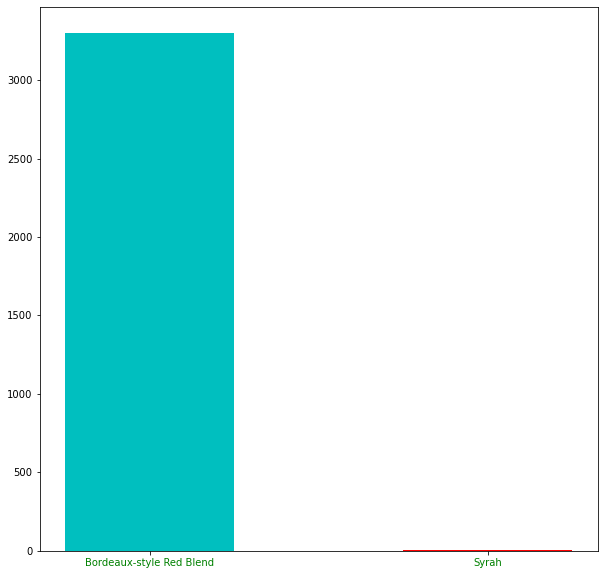

In [117]:
plt.figure(figsize=(10,10))
plt.bar(lable,price,
   color = ['c','r'], width = 0.50)

plt.xticks(color = 'green')

plt.show()

### Relation between Price and Points

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


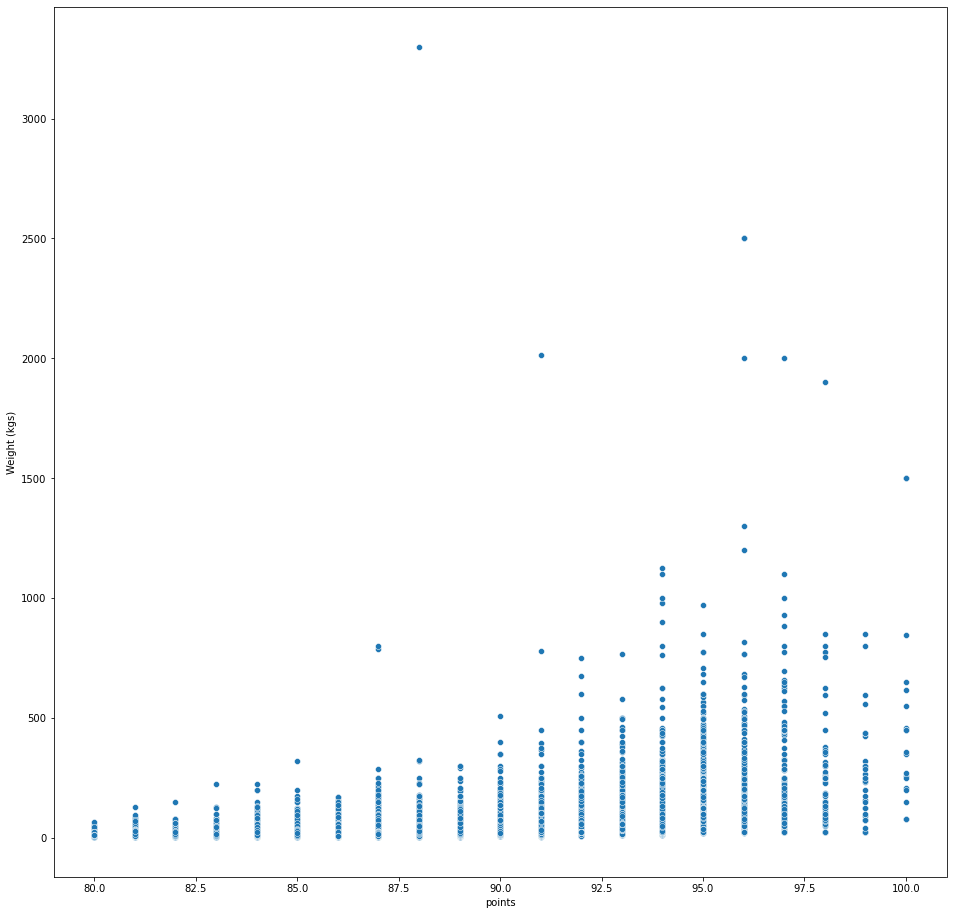

In [118]:
plt.figure(figsize=(16,16))
sns.scatterplot(data['points'],data['price'])

plt.ylabel("Weight (kgs)")
plt.show()

#### Most of the wines are priced below 1000.Highly Priced wines score more points.


### Variety of wine 

In [119]:
variety=data['variety'].value_counts().head(15)

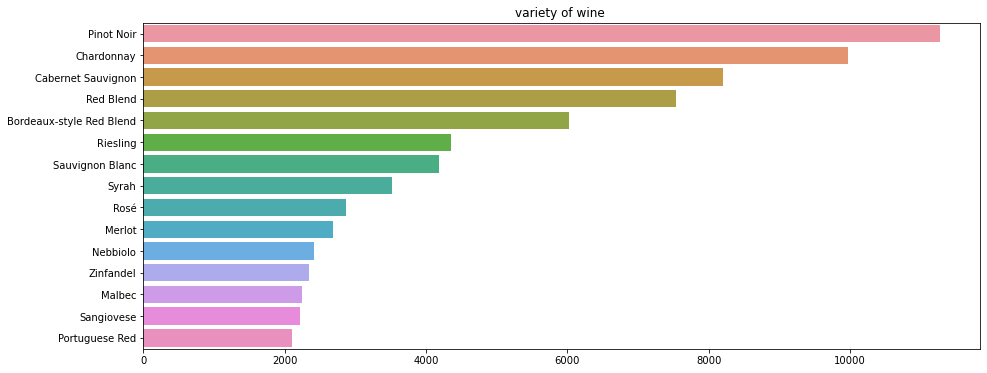

In [120]:
plt.figure(figsize=(15,6))
ax = sns.barplot( x= variety.values, y=variety.index)
ax.set_title('variety of wine ');


In [121]:
wine_price_range = data.groupby(['variety']).price.agg([min, max]).sort_values(by=['min', 'max'], ascending=False)
wine_price_range

,min,max
variety,,
Ramisco,495.0,495.0
Terrantez,236.0,236.0
Francisa,160.0,160.0
Tinta Negra Mole,112.0,112.0
Pignolo,70.0,70.0
...,...,...
Merlot,4.0,625.0
Tempranillo,4.0,600.0
White Blend,4.0,375.0


### The most  wines country

In [122]:
wine_per_country=data['country'].value_counts().head(10)

In [123]:
wine_per_country

US           46437
France       18549
Italy        16312
Spain         5559
Portugal      4817
Chile         3896
Argentina     3288
Austria       2722
Australia     2061
Germany       1819
Name: country, dtype: int64

No handles with labels found to put in legend.


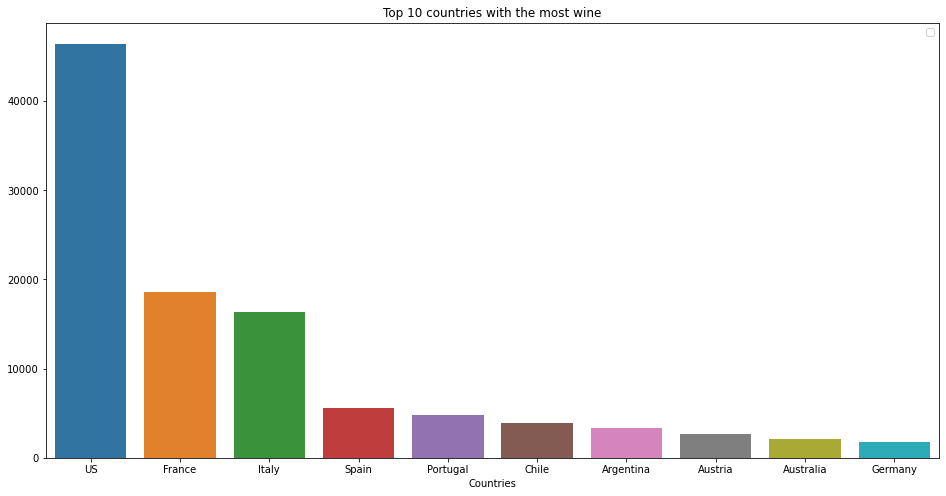

In [124]:
plt.figure(figsize = (16,8))
plt.title('Top 10 countries with the most wine')
sns.barplot(x = wine_per_country.index, y = wine_per_country.values)
plt.xlabel('Countries')
plt.legend()

#### USA has the most wine followed by France ,Italy

### Wines price according to country

In [125]:
wine_country=data.groupby('country').mean().reset_index()

In [126]:
wine_country1=wine_country.sort_values('price',ascending=False).head(20)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


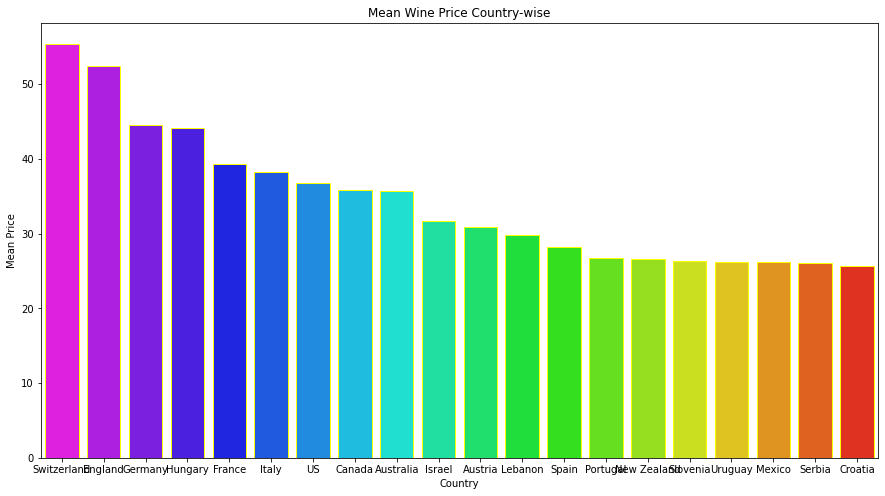

In [127]:
plt.figure(figsize=(15,8))
sns.barplot(wine_country1['country'],wine_country1['price'],edgecolor='yellow',palette='gist_rainbow_r')
plt.xlabel("Country")
plt.ylabel("Mean Price")
plt.title('Mean Wine Price Country-wise')
plt.show()

#### Switzerland wines are highest priced on an average.

### Wines points according to country

In [128]:
wine_country2=wine_country.sort_values('points',ascending=False).head(20)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


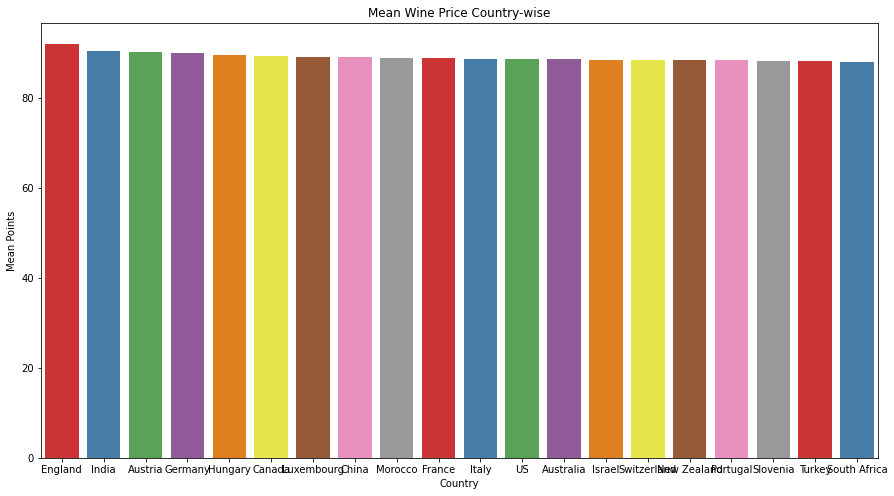

In [129]:
plt.figure(figsize=(15,8))
sns.barplot(wine_country2['country'],wine_country2['points'],palette='Set1')
plt.xlabel("Country")
plt.ylabel("Mean Points")
plt.title('Mean Wine Price Country-wise')
plt.show()

#### The difference is very close to each other of  the top 15 countries with highest mean wine points

### Impact of Point on price

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


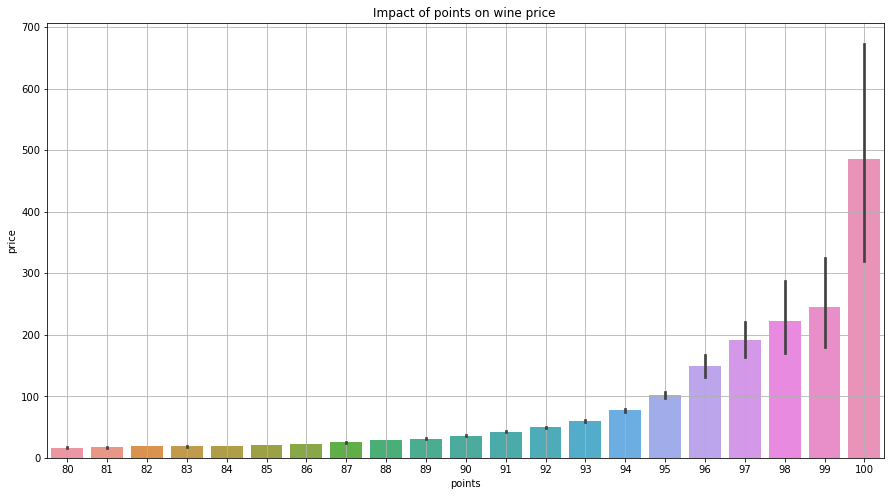

In [130]:
#let's check the impact of rating on price
plt.figure(figsize = (15,8))
sns.barplot(data['points'], data['price'])
plt.grid()
plt.title('Impact of points on wine price ')
plt.show()

### Wine Points Distribution

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


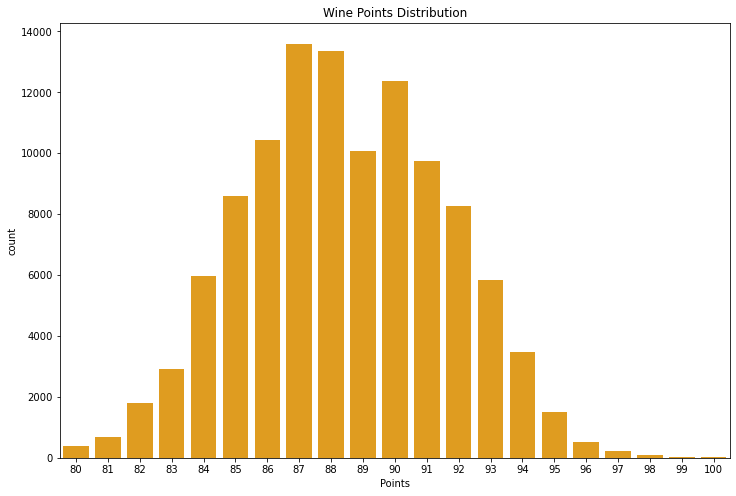

In [131]:
plt.figure(figsize=(12,8))
fig = sns.countplot(data['points'], color="orange")
fig.set_xlabel("Points")
plt.title('Wine Points Distribution')
plt.show()

#### Most number of wines have 88 points.

### Most frequent tasters

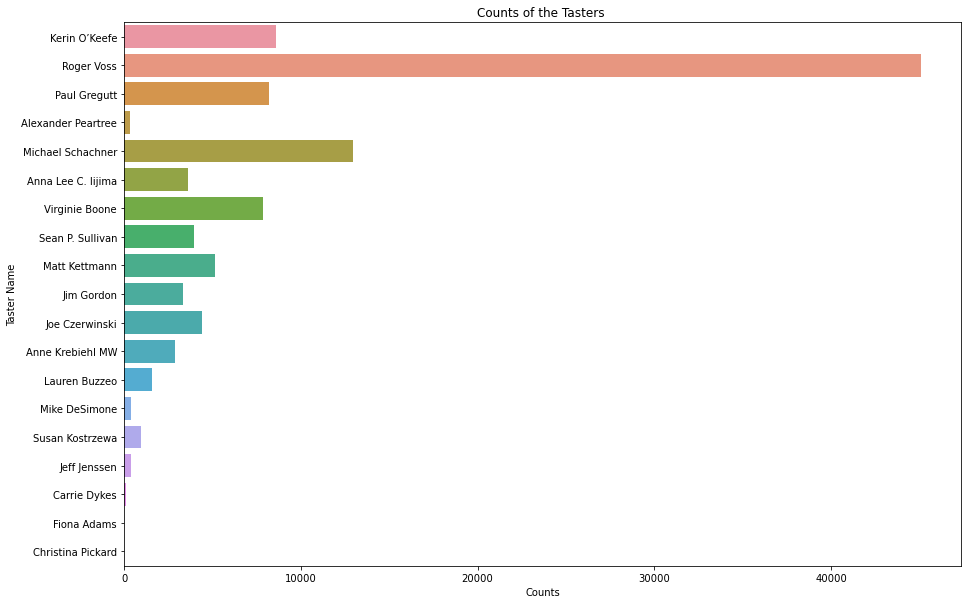

In [132]:
# use a different colour palette in count plot
plt.figure(figsize=(15,10))
sns.countplot(y='taster_name',data=data)  
plt.title("Counts of the Tasters ")
plt.ylabel("Taster Name")
plt.xlabel("Counts")
plt.show()

#### Most number of test doing by Roger Voss tester

### Wines price according to variety

In [133]:
wine_variety=data.groupby('variety').mean().reset_index()

In [134]:
wine_variety.head()

,variety,points,price
0,Abouriou,87.666667,35.000000
1,Agiorgitiko,86.918367,24.020408
2,Aglianico,89.266458,37.040752
3,Aidani,82.000000,27.000000
4,Airen,81.666667,9.000000


In [135]:
wine_variety1=wine_variety.sort_values('price',ascending=False).head(20)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


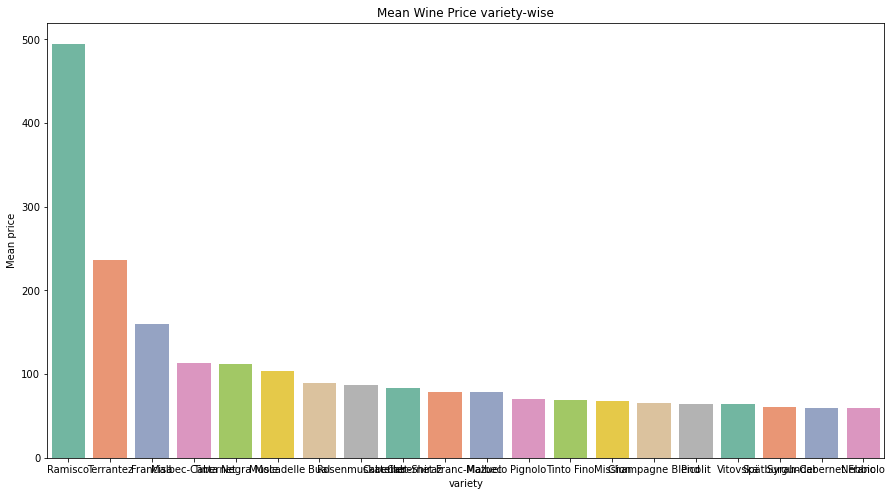

In [136]:
plt.figure(figsize=(15,8))
sns.barplot(wine_variety1['variety'],wine_variety1['price'],palette='Set2')
plt.xlabel("variety")
plt.ylabel("Mean price")
plt.title('Mean Wine Price variety-wise')
plt.show()

#### Ramisco wines are very expensive on an average!!

### Wines points according to variety

In [137]:
wine_variety2=wine_variety.sort_values('points',ascending=False).head(20)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


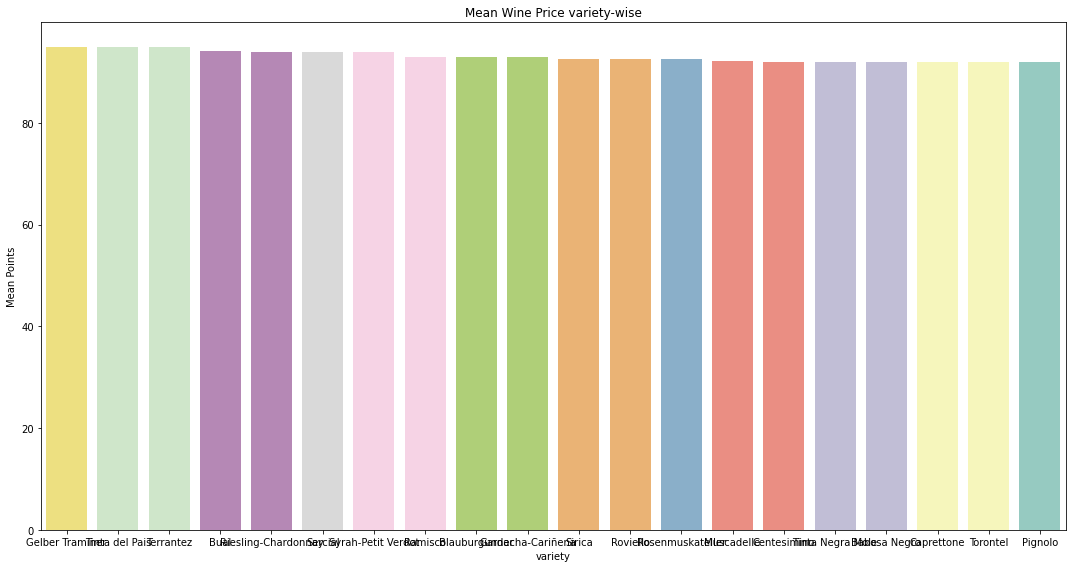

In [138]:
plt.figure(figsize=(15,8))
sns.barplot(wine_variety2['variety'],wine_variety2['points'],palette='Set3_r')
plt.xlabel("variety")
plt.ylabel("Mean Points")
plt.title('Mean Wine Price variety-wise')
plt.tight_layout()

#### The difference is very close to each other of the top 15 variety with highest mean wine points

In [139]:
data.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Napa Valley,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


### Feature Selection Technique

In [140]:
data.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Napa Valley,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


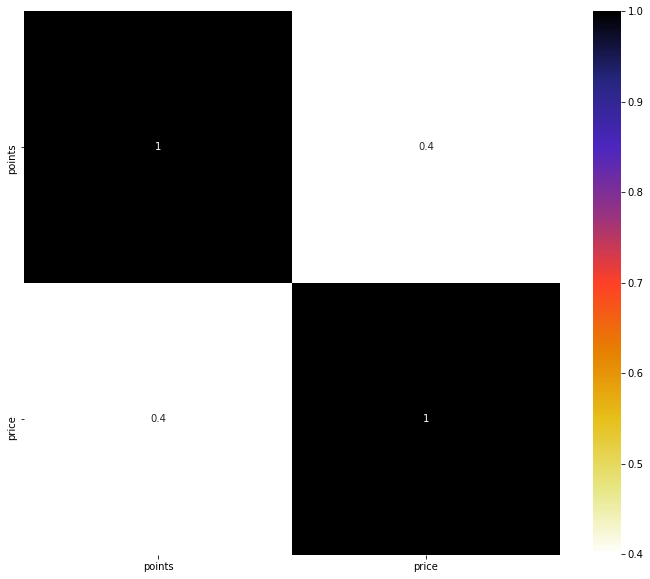

In [141]:
#Correlation 
#Displaying Correlation between varaibles using heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [142]:
#This function filters out most correlated variables, threshold values is decided by us like 80% or more than that 
def correlation(data,threshold):
    col_corr = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [143]:
#Getting ALL feature who are correlated to each other and had correlation values more than 80%
corr_feature = correlation(data, 0.6)
len(set(corr_feature))

0

In [144]:
#Displaying all highly correlated variables
print(corr_feature)

set()


###  Outlier Detection

In [145]:
data.head()

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
0,Italy,Vulkà Bianco,87,25.0,Sicily & Sardinia,Etna,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,Avidagos,87,15.0,Douro,Napa Valley,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,Reserve,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [146]:
# Outlier Detection in price

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

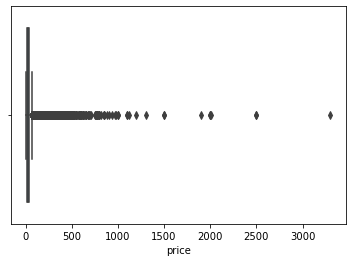

In [147]:
sns.boxplot(data['price'])

In [148]:
mean = data['price'].mean()
mean

35.150285859946834

In [149]:
std_deviation = data['price'].std()
std_deviation

41.88952114595595

In [150]:
data[(data['price'] < (mean-3*std_deviation)) | (data['price'] > (mean+3*std_deviation))]

,country,designation,points,price,province,region_1,taster_name,title,variety,winery
284,Argentina,Marchiori Vineyard Block C2,92,215.0,Mendoza Province,Perdriel,Michael Schachner,Viña Cobos 2011 Marchiori Vineyard Block C2 Ma...,Malbec,Viña Cobos
345,Australia,Rare,100,350.0,Victoria,Rutherglen,Joe Czerwinski,Chambers Rosewood Vineyards NV Rare Muscat (Ru...,Muscat,Chambers Rosewood Vineyards
346,Australia,Rare,98,350.0,Victoria,Rutherglen,Joe Czerwinski,Chambers Rosewood Vineyards NV Rare Muscadelle...,Muscadelle,Chambers Rosewood Vineyards
347,Germany,Kiedrich Gräfenberg Trockenbeerenauslese,97,775.0,Rheingau,Napa Valley,Anna Lee C. Iijima,Robert Weil 2014 Kiedrich Gräfenberg Trockenbe...,Riesling,Robert Weil
349,Australia,RunRig,97,225.0,South Australia,Barossa,Joe Czerwinski,Torbreck 2012 RunRig Shiraz-Viognier (Barossa),Shiraz-Viognier,Torbreck
...,...,...,...,...,...,...,...,...,...,...
129141,US,Estate,92,175.0,California,Rutherford,Roger Voss,Staglin 2005 Estate Cabernet Sauvignon (Ruther...,Cabernet Sauvignon,Staglin
129251,Chile,Taita,93,300.0,Colchagua Valley,Napa Valley,Michael Schachner,Montes 2009 Taita Red (Colchagua Valley),Red Blend,Montes
129293,US,Special Selection,90,180.0,California,Napa Valley,Virginie Boone,Caymus 2014 Special Selection Cabernet Sauvign...,Cabernet Sauvignon,Caymus
129666,France,Reserve,93,235.0,Burgundy,Corton-Charlemagne,Roger Voss,Jean-Luc and Paul Aegerter 2014 Corton-Charle...,Chardonnay,Jean-Luc and Paul Aegerter


In [151]:
data = data[(data['price']<(mean+3*std_deviation)) & (data['price']>(mean-3*std_deviation))]
data.shape

(108796, 10)

### Wine price prediction

### Data Spliting

In [168]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
X = data.drop('price',axis='columns')
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=15)

### CatBoostClassifier

In [153]:
from catboost import CatBoostClassifier

In [169]:
#To be used during Catboost's Feature Importance extractor
categorical_features_indices =np.where(X.dtypes == np.object)[0]

<ipython-input-169-5a17d863dd9c>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices =np.where(X.dtypes == np.object)[0]


In [174]:
from catboost import Pool, CatBoostRegressor, cv

model = CatBoostRegressor(random_seed = 350,loss_function = 'RMSE',iterations=350)
#fitting the train data
model.fit(X_train, y_train,cat_features = categorical_features_indices,verbose=False)

In [176]:
y_pre=model.predict(X_test)

In [177]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pre))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pre)))

Mean Absolute Error : 8.575457049493547
Root Mean Squared Error :  13.947688313564273


### Quantity points prediction

### Data Spliting

In [158]:
# We're splitting up our data set into groups called 'train' and 'test'
from sklearn.model_selection import train_test_split

#split dataset in features and target variable
X = data.drop('points',axis='columns')
y = data['points']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=15)

### CatBoostClassifier

In [159]:
from catboost import CatBoostClassifier

In [160]:
#To be used during Catboost's Feature Importance extractor
categorical_features_indices =np.where(X.dtypes == np.object)[0]

<ipython-input-160-5a17d863dd9c>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_features_indices =np.where(X.dtypes == np.object)[0]


In [161]:
categorical_features_indices

array([0, 1, 3, 4, 5, 6, 7, 8], dtype=int64)

In [162]:
from catboost import Pool, CatBoostRegressor, cv

model = CatBoostRegressor(random_seed = 350,loss_function = 'RMSE',iterations=350)
#fitting the train data
model.fit(X_train, y_train,cat_features = categorical_features_indices,verbose=False)

In [163]:
y_pred=model.predict(X_test)

In [164]:
from sklearn import metrics
print('Mean Absolute Error :', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error :', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error : 1.6190958450794715
Mean Squared Error : 4.245408234680573
Root Mean Squared Error :  2.0604388451688083
